In [1]:
library(ggplot2)
library(forecast )
library(fpp2)
library(seasonal)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'forecast' was built under R version 3.6.2"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff
Warning message:
"package 'fpp2' was built under R version 3.6.2"Loading required package: fma
Warning message:
"package 'fma' was built under R version 3.6.2"Loading required package: expsmooth
Warning message:
"package 'expsmooth' was built under R version 3.6.2"Warning message:
"package 'seasonal' was built under R version 3.6.2"

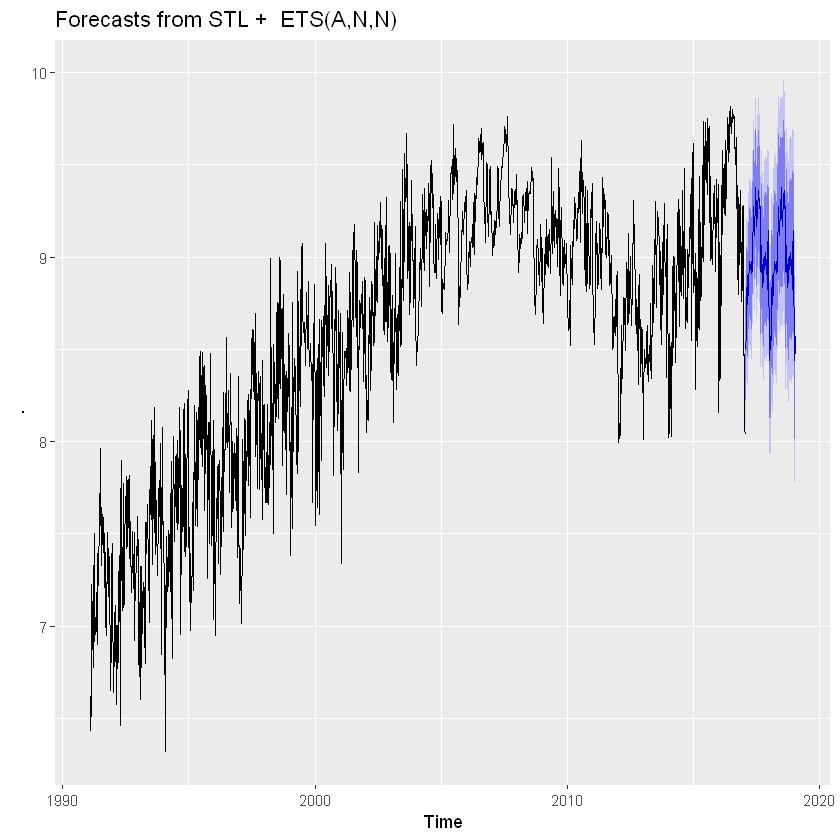

In [2]:
gasoline %>% stlf() %>% autoplot()

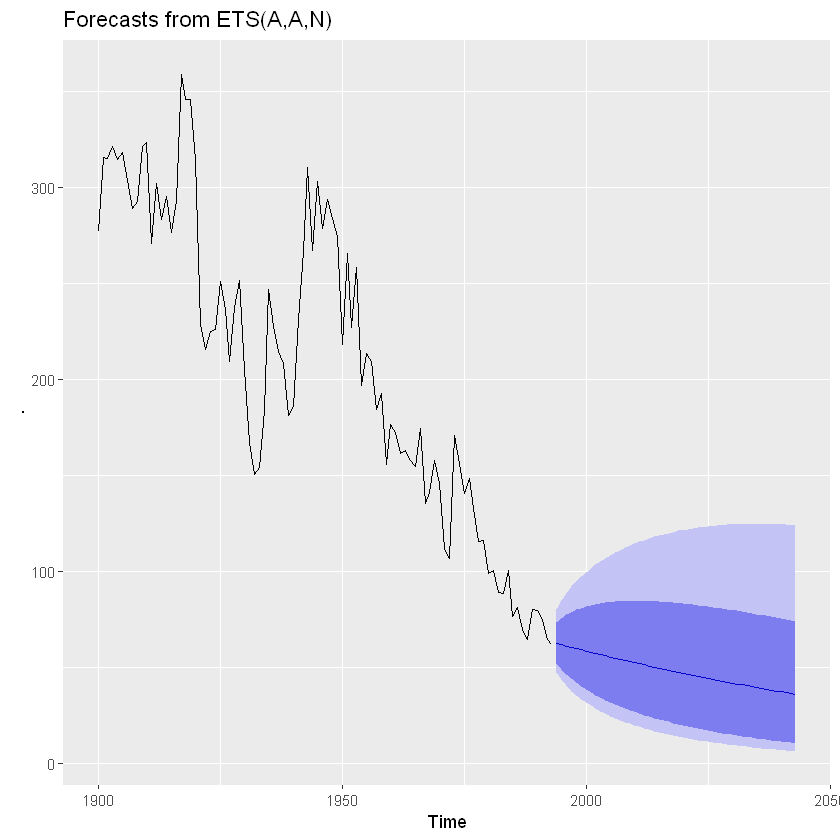

In [3]:
eggs %>%
  ets(model="AAN", damped=FALSE, lambda=0) %>%
  forecast(h=50, biasadj=TRUE) %>%
  autoplot()

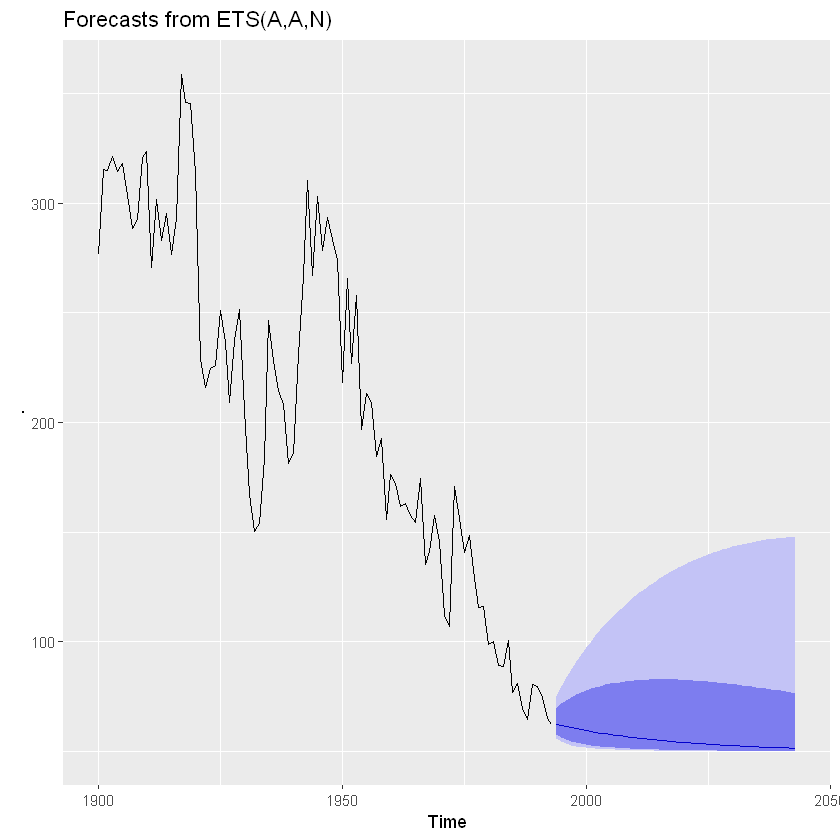

In [4]:
    # Bounds
    a <- 50
    b <- 400
    # Transform data and fit model
    fit <- log((eggs-a)/(b-eggs)) %>%
      ets(model="AAN", damped=FALSE)
    fc <- forecast(fit, h=50)
    # Back-transform forecasts
    fc[["mean"]] <- (b-a)*exp(fc[["mean"]]) /
      (1+exp(fc[["mean"]])) + a
    fc[["lower"]] <- (b-a)*exp(fc[["lower"]]) /
     (1+exp(fc[["lower"]])) + a
    fc[["upper"]] <- (b-a)*exp(fc[["upper"]]) /
     (1+exp(fc[["upper"]])) + a
    fc[["x"]] <- eggs
    # Plot result on original scale
    autoplot(fc)

In [5]:
train <- window(auscafe, end=c(2012,9))
h <- length(auscafe) - length(train)
ETS <- forecast(ets(train), h=h)
ARIMA <- forecast(auto.arima(train, lambda=0, biasadj=TRUE),
  h=h)
STL <- stlf(train, lambda=0, h=h, biasadj=TRUE)
NNAR <- forecast(nnetar(train), h=h)
TBATS <- forecast(tbats(train, biasadj=TRUE), h=h)
Combination <- (ETS[["mean"]] + ARIMA[["mean"]] +
  STL[["mean"]] + NNAR[["mean"]] + TBATS[["mean"]])/5

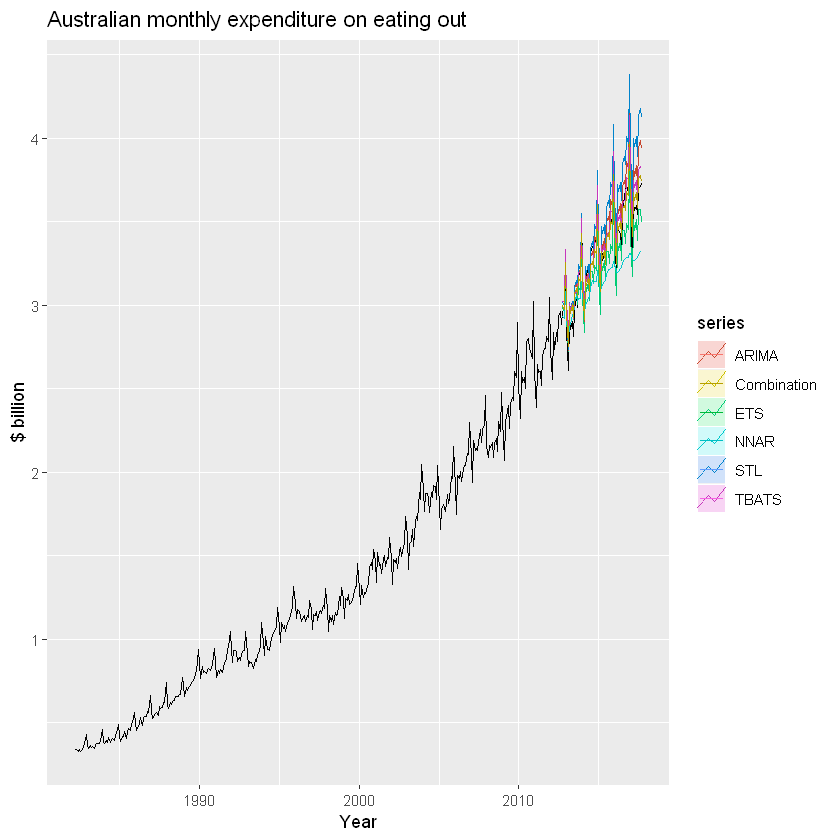

In [6]:
autoplot(auscafe) +
  autolayer(ETS, series="ETS", PI=FALSE) +
  autolayer(ARIMA, series="ARIMA", PI=FALSE) +
  autolayer(STL, series="STL", PI=FALSE) +
  autolayer(NNAR, series="NNAR", PI=FALSE) +
  autolayer(TBATS, series="TBATS", PI=FALSE) +
  autolayer(Combination, series="Combination") +
  xlab("Year") + ylab("$ billion") +
  ggtitle("Australian monthly expenditure on eating out")

In [7]:
c(ETS = accuracy(ETS, auscafe)["Test set","RMSE"],
  ARIMA = accuracy(ARIMA, auscafe)["Test set","RMSE"],
  `STL-ETS` = accuracy(STL, auscafe)["Test set","RMSE"],
  NNAR = accuracy(NNAR, auscafe)["Test set","RMSE"],
  TBATS = accuracy(TBATS, auscafe)["Test set","RMSE"],
  Combination =
    accuracy(Combination, auscafe)["Test set","RMSE"])
#>         ETS       ARIMA     STL-ETS        NNAR 
#>     0.13700     0.12146     0.21446     0.31769 
#>       TBATS Combination 
#>     0.09406     0.07165

ETS       ARIMA     STL-ETS        NNAR       TBATS Combination 
 0.13699696  0.12146220  0.21446157  0.26233099  0.09406039  0.07072720

In [8]:
# First fit a model to the data
fit <- ets(gas/1000)
# Forecast six months ahead
fc <- forecast(fit, h=6)
# Simulate 10000 future sample paths
nsim <- 10000
h <- 6
sim <- numeric(nsim)
for(i in seq_len(nsim))
  sim[i] <- sum(simulate(fit, future=TRUE, nsim=h))
meanagg <- mean(sim)

In [9]:
sum(fc[["mean"]][1:6])
#> [1] 281.8
meanagg
#> [1] 281.7

[1] 281.8006

[1] 281.5892

In [10]:
#80% interval:
quantile(sim, prob=c(0.1, 0.9))
#> 10% 90% 
#> 263 301
#95% interval:
quantile(sim, prob=c(0.025, 0.975))
#>  2.5% 97.5% 
#> 254.1 311.4

10%      90% 
262.9092 300.7079

2.5%    97.5% 
254.3392 311.4728

In [11]:
library(Mcomp)
library(purrr)
n <- map_int(M1, function(x) {length(x[["x"]])})
M1[n < 20] %>%
  map_int(function(u) {
    u[["x"]] %>%
      auto.arima() %>%
      coefficients() %>%
      length()
  }) %>%
  table()

Warning message:
"package 'Mcomp' was built under R version 3.6.2"Warning message:
"The chosen seasonal unit root test encountered an error when testing for the second difference.
From stl(): series is not periodic or has less than two periods
1 seasonal differences will be used. Consider using a different unit root test."

.
 0  1  2  3 
54 73 15  2 

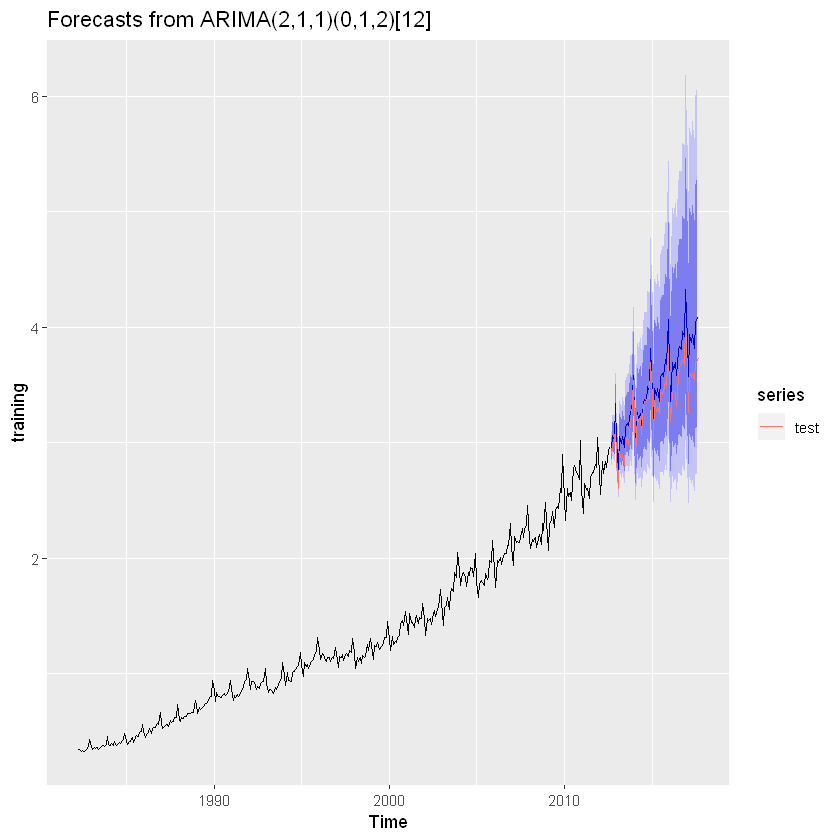

In [12]:
training <- subset(auscafe, end=length(auscafe)-61)
test <- subset(auscafe, start=length(auscafe)-60)
cafe.train <- Arima(training, order=c(2,1,1),
  seasonal=c(0,1,2), lambda=0)
cafe.train %>%
  forecast(h=60) %>%
  autoplot() + autolayer(test)

Warning message:
"Removed 25 rows containing missing values (geom_path)."

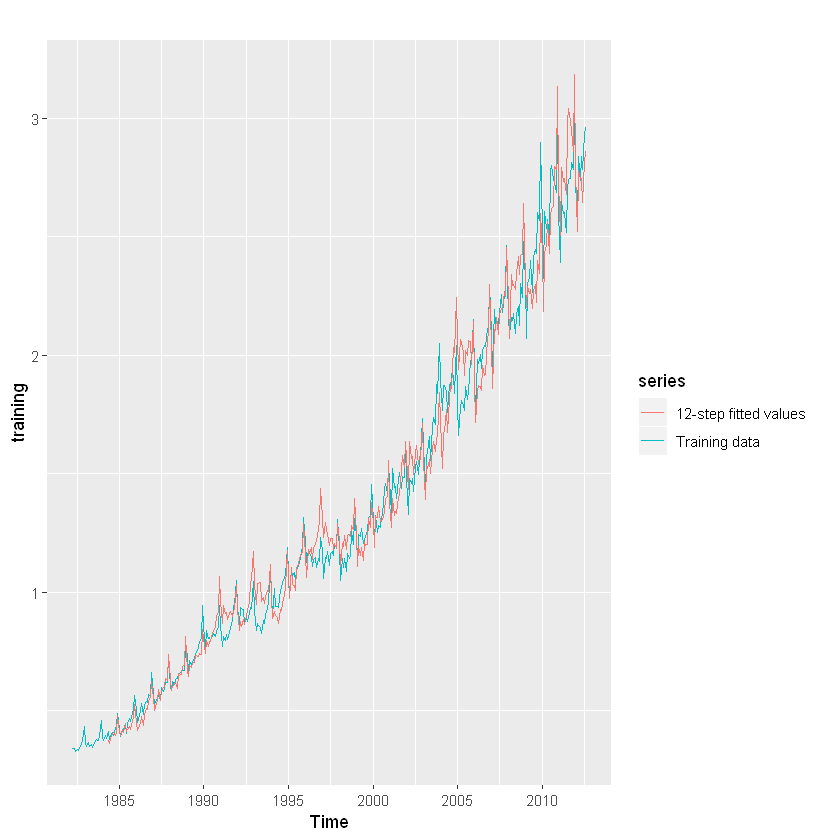

In [13]:
autoplot(training, series="Training data") +
  autolayer(fitted(cafe.train, h=12),
    series="12-step fitted values")

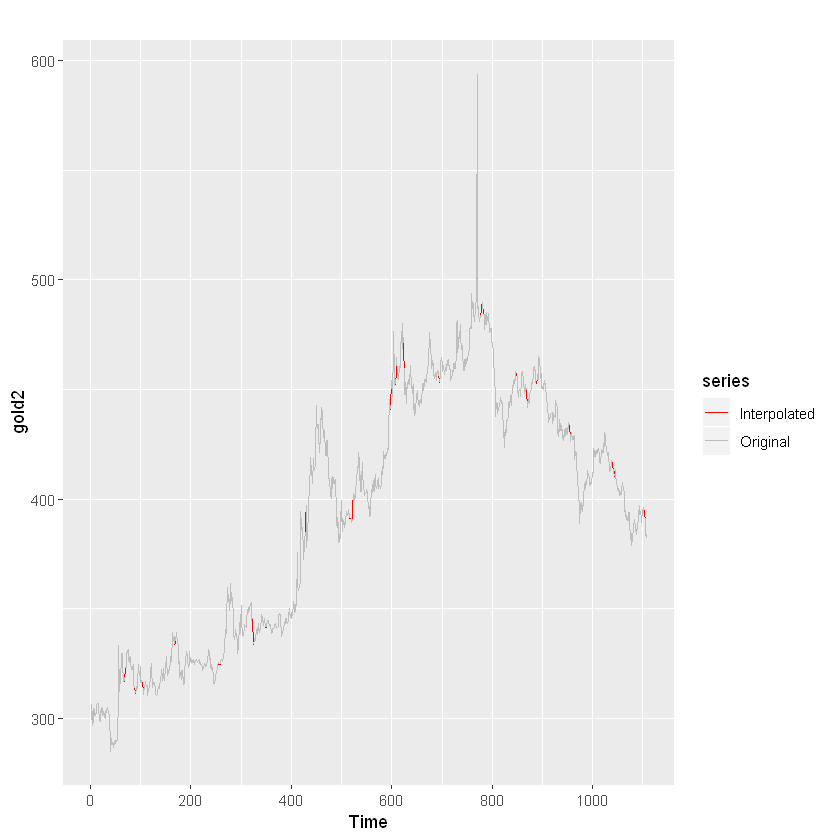

In [14]:
gold2 <- na.interp(gold)
autoplot(gold2, series="Interpolated") +
  autolayer(gold, series="Original") +
  scale_colour_manual(
    values=c(`Interpolated`="red",`Original`="gray"))

In [15]:
tsoutliers(gold)s
#> $index
#> [1] 770
#> 
#> $replacements
#> [1] 494.9

$index
[1] 770

$replacements
[1] 494.9